# Analysis of First Batch of Model Runs

Basic analysis of first batch of runs.

Currently plots time series of averages across Monte Carlo simulations.

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

number_of_agents = 100

# Stag Hunt

In [2]:
# Read data and setup main dataframe for Stag Hunt.
# df uses multilevel indexing.  The first column level corresponds to the MC simulation.  The second
# column level denotes agent payoffs, ingroup and outgroup beliefs. The rows are the simulation timesteps, with 200
# inbetween steps not recorded.  E.g df.loc(:, (1, 'P0')) would return the times series of payoffs for agent 0 in the 
# 1th MC simulation.

dataList_SH = []

header_list = ["P" + str(i) for i in range(number_of_agents)] + ["I" + str(i) for i in range(number_of_agents)] + ["O" + str(i) for i in range(number_of_agents)]

for datafile in glob.glob('results' + "/*_SH_*.csv"):
    dataList_SH.append(pd.read_csv(datafile, names=header_list))

df = pd.concat(dataList_SH, axis=1, keys = range(len(dataList_SH)))

In [3]:
# Select and separate relevant data

df_payoff = df.loc[:, pd.IndexSlice[:, 'P0':'P99']]
df_payoff_0 = df.loc[:, pd.IndexSlice[:, 'P0':'P49']]
df_payoff_1 = df.loc[:, pd.IndexSlice[:, 'P50':'P99']]

df_0_ingroup = df.loc[:, pd.IndexSlice[:, 'I0':'I49']]
df_1_ingroup = df.loc[:, pd.IndexSlice[:, 'I50':'I99']]

df_0_outgroup = df.loc[:, pd.IndexSlice[:, 'O0':'O49']]
df_1_outgroup = df.loc[:, pd.IndexSlice[:, 'O50':'O99']]



In [4]:
# Find mean of means across Monte Carlo simulations
mc_payoff_time_series = df_payoff.mean(axis=1, level=0).mean(axis=1)
mc_payoff_0_time_series = df_payoff_0.mean(axis=1, level=0).mean(axis=1)
mc_payoff_1_time_series = df_payoff_1.mean(axis=1, level=0).mean(axis=1)


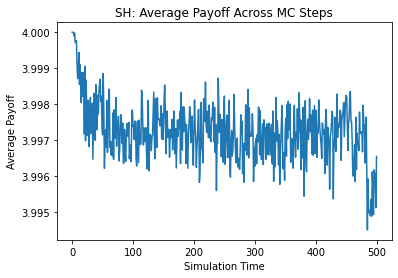

In [5]:
plt.plot(mc_payoff_time_series)
plt.xlabel("Simulation Time")
plt.ylabel("Average Payoff")
plt.title("SH: Average Payoff Across MC Steps")
plt.show()

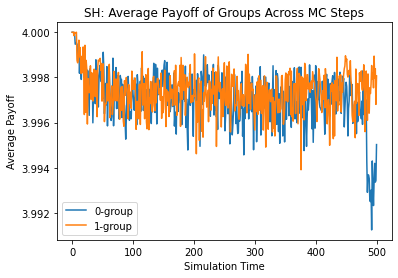

In [6]:
plt.plot(mc_payoff_0_time_series, label="0-group")
plt.plot(mc_payoff_1_time_series, label="1-group")
plt.xlabel("Simulation Time")
plt.ylabel("Average Payoff")
plt.title("SH: Average Payoff of Groups Across MC Steps")
plt.legend()
plt.show()

In [7]:
mc_0_ingroup_time_series = df_0_ingroup.mean(axis=1, level=0).mean(axis=1)
mc_1_ingroup_time_series = df_1_ingroup.mean(axis=1, level=0).mean(axis=1)
mc_0_outgroup_time_series = df_0_outgroup.mean(axis=1, level=0).mean(axis=1)
mc_1_outgroup_time_series = df_1_outgroup.mean(axis=1, level=0).mean(axis=1)

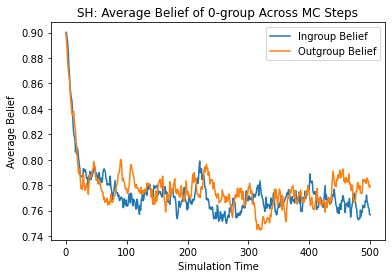

In [8]:
plt.plot(mc_0_ingroup_time_series, label="Ingroup Belief")
plt.plot(mc_0_outgroup_time_series, label="Outgroup Belief")
plt.legend()
plt.xlabel("Simulation Time")
plt.ylabel("Average Belief")
plt.title("SH: Average Belief of 0-group Across MC Steps")
plt.show()


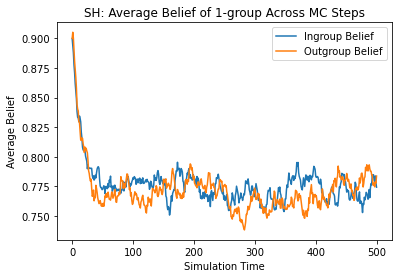

In [9]:
plt.plot(mc_1_ingroup_time_series, label="Ingroup Belief")
plt.plot(mc_1_outgroup_time_series, label="Outgroup Belief")
plt.legend()
plt.xlabel("Simulation Time")
plt.ylabel("Average Belief")
plt.title("SH: Average Belief of 1-group Across MC Steps")
plt.show()

# Prisoner's Dilemma

In [10]:
dataList_PD = []

header_list = ["P" + str(i) for i in range(number_of_agents)] + ["I" + str(i) for i in range(number_of_agents)] + ["O" + str(i) for i in range(number_of_agents)]

for datafile in glob.glob('results' + "/*_PD_*.csv"):
    dataList_PD.append(pd.read_csv(datafile, names=header_list))

df_PD = pd.concat(dataList_PD, axis=1, keys = range(len(dataList_PD)))

In [11]:
# Select and separate relevant data

df_PD_payoff = df_PD.loc[:, pd.IndexSlice[:, 'P0':'P99']]
df_PD_payoff_0 = df_PD.loc[:, pd.IndexSlice[:, 'P0':'P49']]
df_PD_payoff_1 = df_PD.loc[:, pd.IndexSlice[:, 'P50':'P99']]

df_PD_0_ingroup = df_PD.loc[:, pd.IndexSlice[:, 'I0':'I49']]
df_PD_1_ingroup = df_PD.loc[:, pd.IndexSlice[:, 'I50':'I99']]

df_PD_0_outgroup = df_PD.loc[:, pd.IndexSlice[:, 'O0':'O49']]
df_PD_1_outgroup = df_PD.loc[:, pd.IndexSlice[:, 'O50':'O99']]

In [12]:
# Find mean of means across Monte Carlo simulations
mc_PD_payoff_time_series = df_PD_payoff.mean(axis=1, level=0).mean(axis=1)
mc_PD_payoff_0_time_series = df_PD_payoff_0.mean(axis=1, level=0).mean(axis=1)
mc_PD_payoff_1_time_series = df_PD_payoff_1.mean(axis=1, level=0).mean(axis=1)

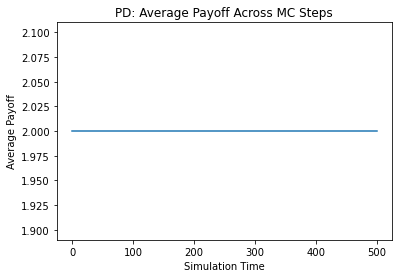

In [13]:
plt.plot(mc_PD_payoff_time_series)
plt.xlabel("Simulation Time")
plt.ylabel("Average Payoff")
plt.title("PD: Average Payoff Across MC Steps")
plt.show()

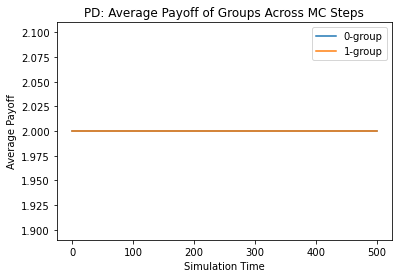

In [14]:
plt.plot(mc_PD_payoff_0_time_series, label="0-group")
plt.plot(mc_PD_payoff_1_time_series, label="1-group")
plt.xlabel("Simulation Time")
plt.ylabel("Average Payoff")
plt.title("PD: Average Payoff of Groups Across MC Steps")
plt.legend()
plt.show()

In [15]:
mc_PD_0_ingroup_time_series = df_PD_0_ingroup.mean(axis=1, level=0).mean(axis=1)
mc_PD_1_ingroup_time_series = df_PD_1_ingroup.mean(axis=1, level=0).mean(axis=1)
mc_PD_0_outgroup_time_series = df_PD_0_outgroup.mean(axis=1, level=0).mean(axis=1)
mc_PD_1_outgroup_time_series = df_PD_1_outgroup.mean(axis=1, level=0).mean(axis=1)

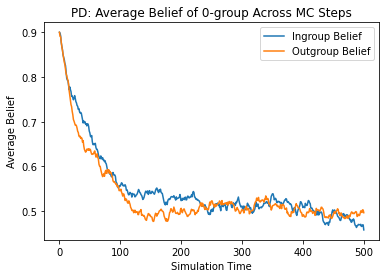

In [16]:
plt.plot(mc_PD_0_ingroup_time_series, label="Ingroup Belief")
plt.plot(mc_PD_0_outgroup_time_series, label="Outgroup Belief")
plt.legend()
plt.xlabel("Simulation Time")
plt.ylabel("Average Belief")
plt.title("PD: Average Belief of 0-group Across MC Steps")
plt.show()


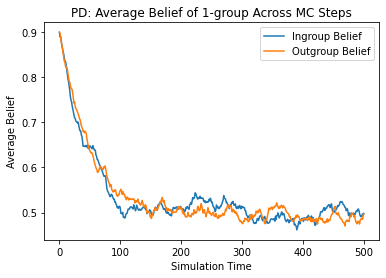

In [17]:
plt.plot(mc_PD_1_ingroup_time_series, label="Ingroup Belief")
plt.plot(mc_PD_1_outgroup_time_series, label="Outgroup Belief")
plt.legend()
plt.xlabel("Simulation Time")
plt.ylabel("Average Belief")
plt.title("PD: Average Belief of 1-group Across MC Steps")
plt.show()